In [1]:
import os
os.chdir('/home/soham/Desktop/GitHub/BTP/scripts/4 Sensors/')

from utils import add_noise, plot_pca_decision_boundary
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split


analyte1 = pd.read_csv('/home/soham/Desktop/GitHub/BTP/data/4sensors/analyte1_4sensors.csv')
analyte2 = pd.read_csv('/home/soham/Desktop/GitHub/BTP/data/4sensors/analyte2_4sensors.csv')
analyte3 = pd.read_csv('/home/soham/Desktop/GitHub/BTP/data/4sensors/analyte3_4sensors.csv')

data = pd.concat([analyte1, analyte2, analyte3], axis=0)
data = data.sample(frac=1).reset_index(drop=True)
data.head()

,Unnamed: 0,CFU/mL,Sensor1,Sensor2,Sensor3,Sensor4,label
0,10,3.814856e+04,138.579496,-60.088184,27.368029,676.974969,3
1,4,6.000000e+01,164.780000,-68.000000,-54.590000,933.423734,3
2,8,3.016707e+05,-299.620732,66.615587,35.432600,962.957503,2
3,21,2.880000e+06,80.430000,-36.700000,102.400000,505.183087,3
4,5,3.050000e+03,-109.940000,-19.620000,-27.240000,514.403733,1


In [2]:
combination = []
svm_train_acc = []
svm_test_acc = []
rfc_train_acc = []
rfc_test_acc = []

## PCA using all 4 sensors

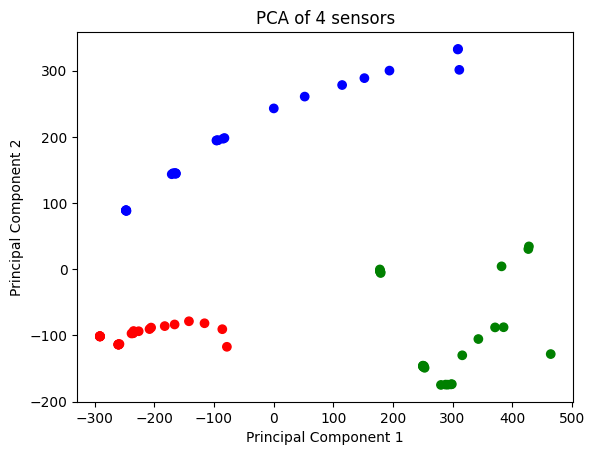

In [3]:
data = data.drop(['Unnamed: 0','CFU/mL'], axis=1)

X = data[['Sensor1', 'Sensor2', 'Sensor3', 'Sensor4']]
Y = data['label'].reset_index(drop=True)

pca = PCA(n_components=2)
X_r = pca.fit_transform(X).T

pca_data = pd.DataFrame(data = X_r.T, columns = ['PC1', 'PC2'])
plt.scatter(pca_data['PC1'], pca_data['PC2'], c=Y.map({1:'red', 2:'green', 3:'blue'}))
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of 4 sensors')
plt.show()

Training accuracy = 1.0
Testing accuracy =  1.0


/home/soham/anaconda3/envs/btpenv/lib/python3.11/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


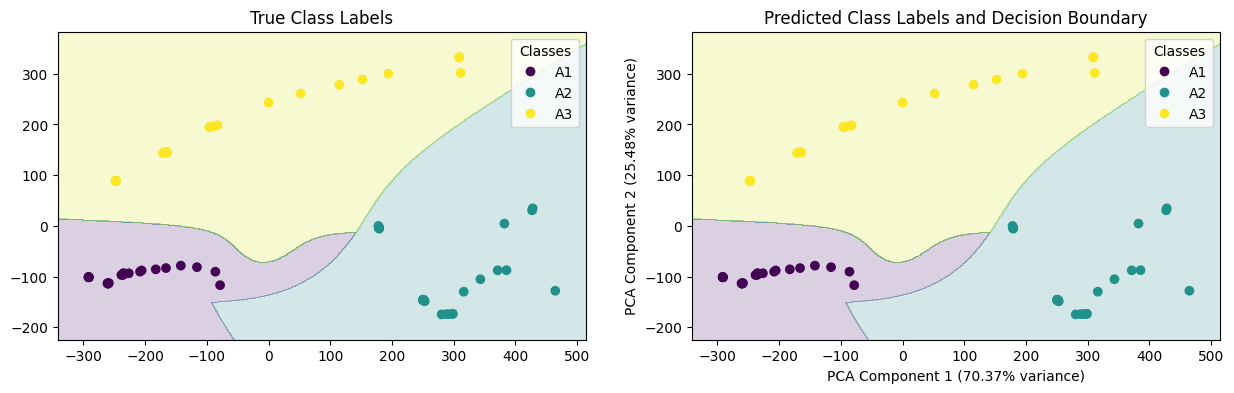

In [4]:
X_train, X_test, Y_train, Y_test = train_test_split(pca_data[['PC1','PC2']], Y, test_size=0.2, random_state=42)

combination.append('S1-S2-S3-S4')

svm = SVC(kernel='poly')
svm.fit(X_train, Y_train)

print('Training accuracy =', svm.score(X_train, Y_train))
svm_train_acc.append(svm.score(X_train, Y_train))

print('Testing accuracy = ',svm.score(X_test, Y_test))
svm_test_acc.append(svm.score(X_test, Y_test))

label_mapping = {1:'A1', 2:'A2', 3:'A3'}
pca_data['Labels'] = Y.map(label_mapping)

plot_pca_decision_boundary(pca, pca_data, svm, label_mapping)

Training accuracy = 1.0
Testing accuracy =  1.0


/home/soham/anaconda3/envs/btpenv/lib/python3.11/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


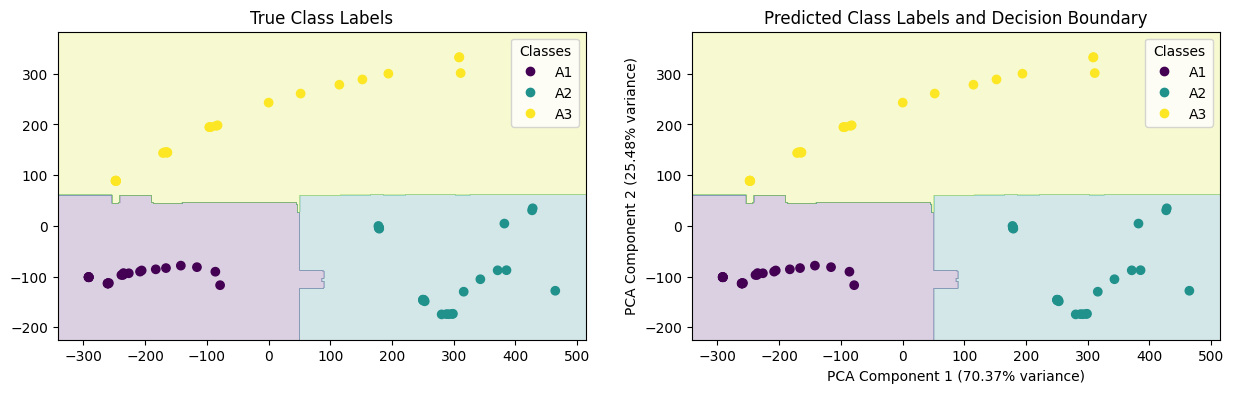

In [5]:
rfc = RandomForestClassifier()
rfc.fit(X_train, Y_train)

print('Training accuracy =', rfc.score(X_train, Y_train))
rfc_train_acc.append(rfc.score(X_train, Y_train))

print('Testing accuracy = ',rfc.score(X_test, Y_test))
rfc_test_acc.append(rfc.score(X_test, Y_test))

plot_pca_decision_boundary(pca, pca_data, rfc, label_mapping)

## PCA using S1, S2

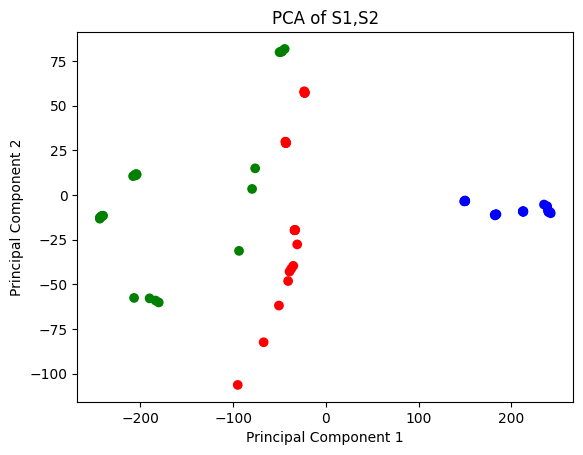

In [6]:
s1_s2_X = data[['Sensor1', 'Sensor2']]

combination.append('S1-S2')

pca = PCA(n_components=2)
X_r = pca.fit_transform(s1_s2_X).T

s1_s2_pca_data = pd.DataFrame(data = X_r.T, columns = ['PC1', 'PC2'])

plt.scatter(s1_s2_pca_data['PC1'], s1_s2_pca_data['PC2'], c=Y.map({1:'red', 2:'green', 3:'blue'}))
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of S1,S2')
plt.show()

Training accuracy = 0.8666666666666667
Testing accuracy =  0.9333333333333333


/home/soham/anaconda3/envs/btpenv/lib/python3.11/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


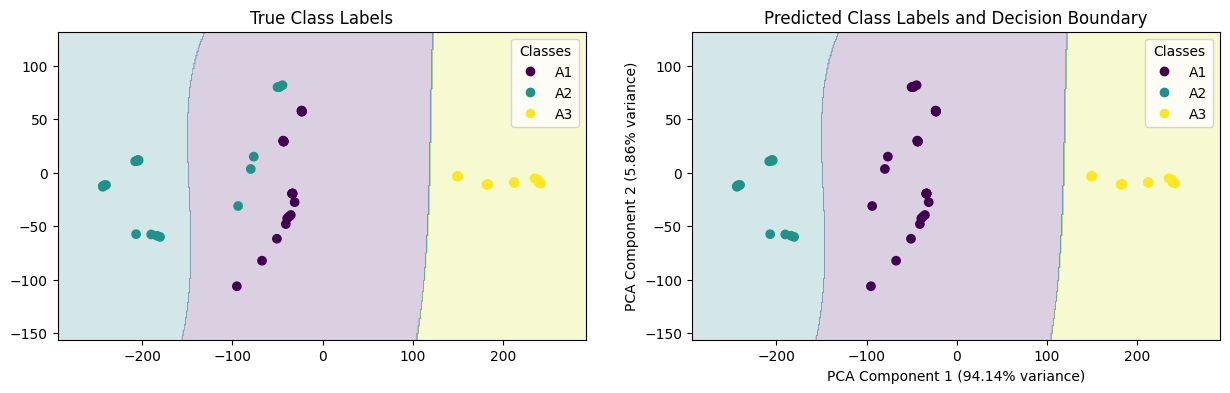

In [7]:
X_train, X_test, Y_train, Y_test = train_test_split(s1_s2_pca_data[['PC1','PC2']], Y, test_size=0.2, random_state=42)

svm = SVC(kernel='poly')
svm.fit(X_train, Y_train)

print('Training accuracy =', svm.score(X_train, Y_train))
svm_train_acc.append(svm.score(X_train, Y_train))

print('Testing accuracy = ',svm.score(X_test, Y_test))
svm_test_acc.append(svm.score(X_test, Y_test))

label_mapping = {1:'A1', 2:'A2', 3:'A3'}
s1_s2_pca_data['Labels'] = Y.map(label_mapping)

plot_pca_decision_boundary(pca, s1_s2_pca_data, svm, label_mapping)

Training accuracy = 1.0
Testing accuracy =  1.0


/home/soham/anaconda3/envs/btpenv/lib/python3.11/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


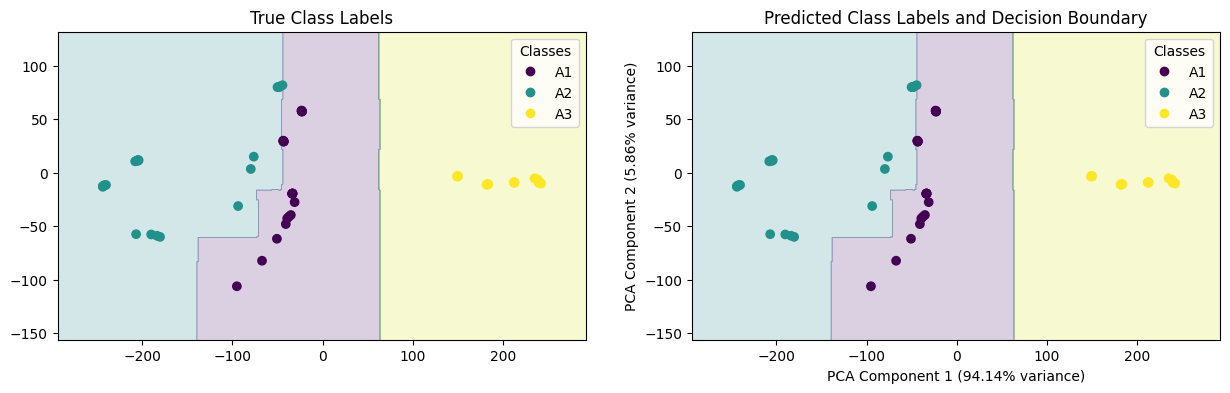

In [8]:
rfc = RandomForestClassifier()
rfc.fit(X_train, Y_train)

print('Training accuracy =', rfc.score(X_train, Y_train))
rfc_train_acc.append(rfc.score(X_train, Y_train))

print('Testing accuracy = ',rfc.score(X_test, Y_test))
rfc_test_acc.append(rfc.score(X_test, Y_test))

plot_pca_decision_boundary(pca, s1_s2_pca_data, rfc, label_mapping)

## PCA using S1, S3

In [9]:
s1_s3_X = data[['Sensor1', 'Sensor3']]

combination.append('S1-S3')

pca = PCA(n_components=2)
X_r = pca.fit_transform(s1_s3_X).T

s1_s3_pca_data = pd.DataFrame(data = X_r.T, columns = ['PC1', 'PC2'])
s1_s3_pca_data.head()

,PC1,PC2
0,200.917607,-3.298280
1,224.560672,-86.030320
2,-236.820927,18.368569
3,145.125900,73.503061
4,-49.177645,-50.163420


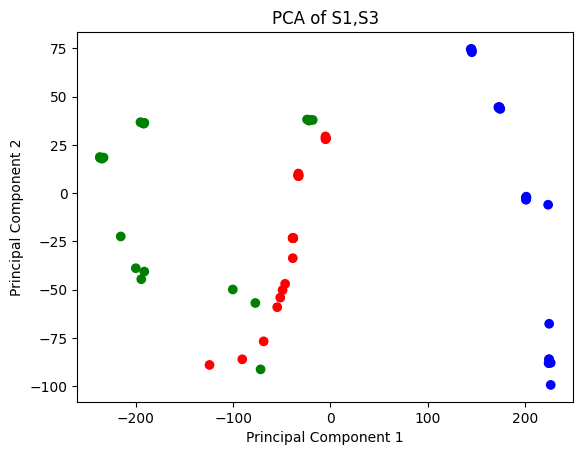

In [10]:
plt.scatter(s1_s3_pca_data['PC1'], s1_s3_pca_data['PC2'], c=Y.map({1:'red', 2:'green', 3:'blue'}))
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of S1,S3')
plt.show()

Training accuracy = 0.8666666666666667
Testing accuracy =  0.9333333333333333


/home/soham/anaconda3/envs/btpenv/lib/python3.11/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


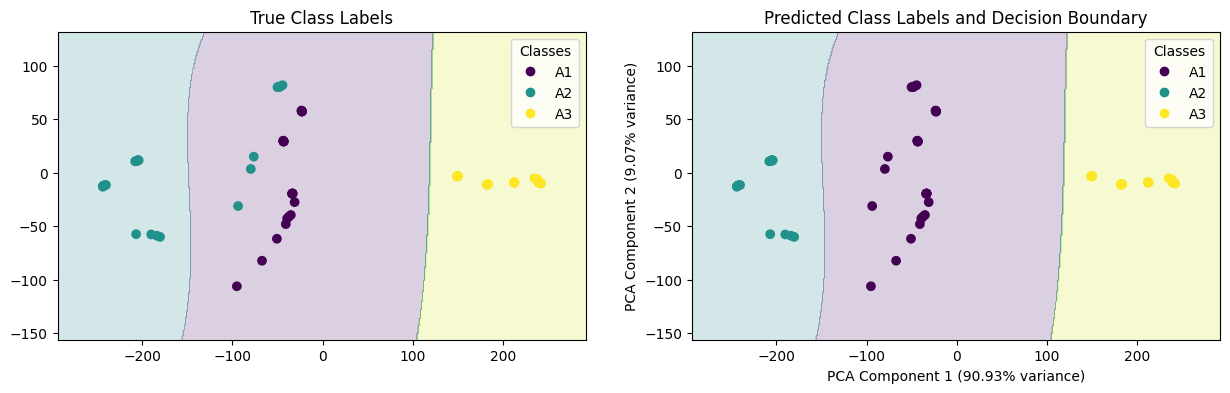

In [11]:
X_train, X_test, Y_train, Y_test = train_test_split(s1_s2_pca_data[['PC1','PC2']], Y, test_size=0.2, random_state=42)

svm = SVC(kernel='poly')
svm.fit(X_train, Y_train)

print('Training accuracy =', svm.score(X_train, Y_train))
svm_train_acc.append(svm.score(X_train, Y_train))

print('Testing accuracy = ',svm.score(X_test, Y_test))
svm_test_acc.append(svm.score(X_test, Y_test))

label_mapping = {1:'A1', 2:'A2', 3:'A3'}
s1_s2_pca_data['Labels'] = Y.map(label_mapping)

plot_pca_decision_boundary(pca, s1_s2_pca_data, svm, label_mapping)

Training accuracy = 1.0
Testing accuracy =  1.0


/home/soham/anaconda3/envs/btpenv/lib/python3.11/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


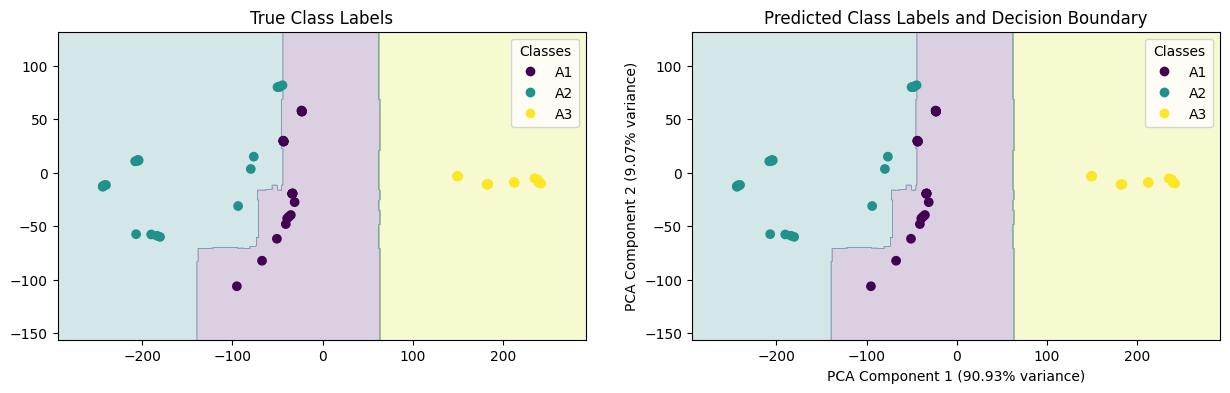

In [12]:
rfc = RandomForestClassifier()
rfc.fit(X_train, Y_train)

print('Training accuracy =', rfc.score(X_train, Y_train))
rfc_train_acc.append(rfc.score(X_train, Y_train))

print('Testing accuracy = ',rfc.score(X_test, Y_test))
rfc_test_acc.append(rfc.score(X_test, Y_test))

plot_pca_decision_boundary(pca, s1_s2_pca_data, rfc, label_mapping)

## PCA using S1, S4

In [13]:
s1_s4_X = data[['Sensor1', 'Sensor4']]

combination.append('S1-S4')

pca = PCA(n_components=2)
X_r = pca.fit_transform(s1_s4_X).T

s1_s4_pca_data = pd.DataFrame(data = X_r.T, columns = ['PC1', 'PC2'])
s1_s4_pca_data.head()

,PC1,PC2
0,-87.719411,185.206953
1,154.781103,272.647997
2,295.746496,-170.825837
3,-240.349497,87.238226
4,-185.364451,-95.251231


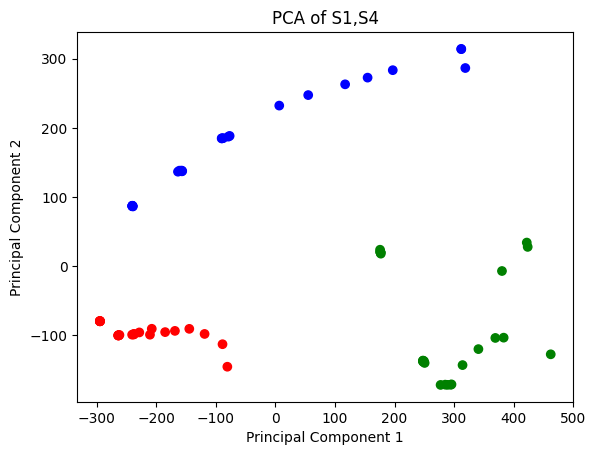

In [14]:
plt.scatter(s1_s4_pca_data['PC1'], s1_s4_pca_data['PC2'], c=Y.map({1:'red', 2:'green', 3:'blue'}))
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of S1,S4')
plt.show()

Training accuracy = 0.8666666666666667
Testing accuracy =  0.9333333333333333


/home/soham/anaconda3/envs/btpenv/lib/python3.11/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


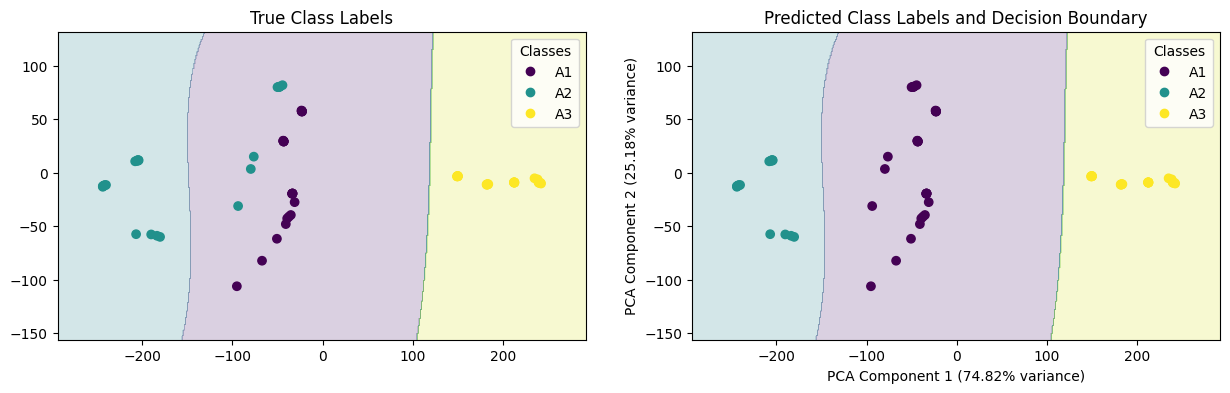

In [15]:
X_train, X_test, Y_train, Y_test = train_test_split(s1_s2_pca_data[['PC1','PC2']], Y, test_size=0.2, random_state=42)

svm = SVC(kernel='poly')
svm.fit(X_train, Y_train)

print('Training accuracy =', svm.score(X_train, Y_train))
svm_train_acc.append(svm.score(X_train, Y_train))

print('Testing accuracy = ',svm.score(X_test, Y_test))
svm_test_acc.append(svm.score(X_test, Y_test))

label_mapping = {1:'A1', 2:'A2', 3:'A3'}
s1_s2_pca_data['Labels'] = Y.map(label_mapping)

plot_pca_decision_boundary(pca, s1_s2_pca_data, svm, label_mapping)

Training accuracy = 1.0
Testing accuracy =  1.0


/home/soham/anaconda3/envs/btpenv/lib/python3.11/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


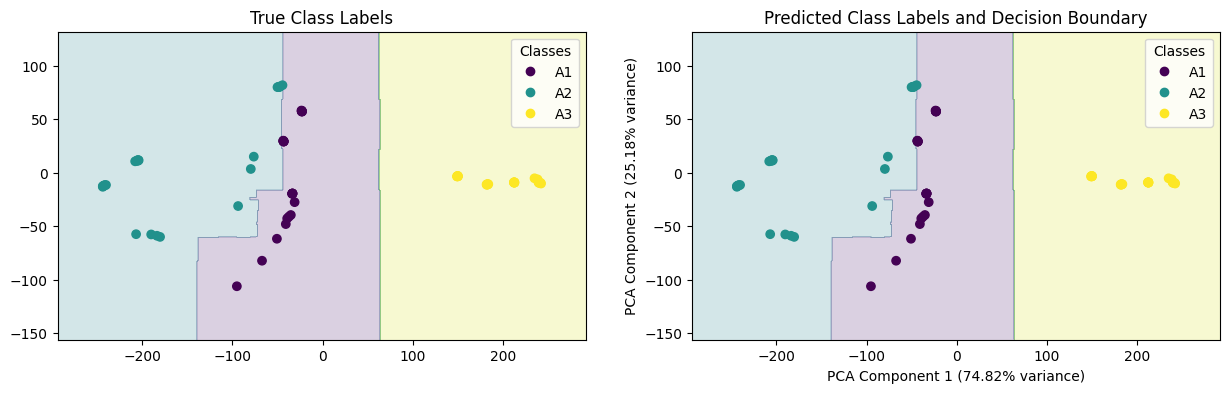

In [16]:
rfc = RandomForestClassifier()
rfc.fit(X_train, Y_train)

print('Training accuracy =', rfc.score(X_train, Y_train))
rfc_train_acc.append(rfc.score(X_train, Y_train))

print('Testing accuracy = ',rfc.score(X_test, Y_test))
rfc_test_acc.append(rfc.score(X_test, Y_test))

plot_pca_decision_boundary(pca, s1_s2_pca_data, rfc, label_mapping)

## PCA using S2, S3

In [17]:
s2_s3_X = data[['Sensor2', 'Sensor3']]

combination.append('S2-S3')

pca = PCA(n_components=2)
X_r = pca.fit_transform(s2_s3_X).T

s2_s3_pca_data = pd.DataFrame(data = X_r.T, columns = ['PC1', 'PC2'])
s2_s3_pca_data.head()

,PC1,PC2
0,-59.618942,35.591564
1,-105.569664,-32.733003
2,55.663864,-17.594499
3,-3.350603,90.461208
4,-50.003793,-31.693349


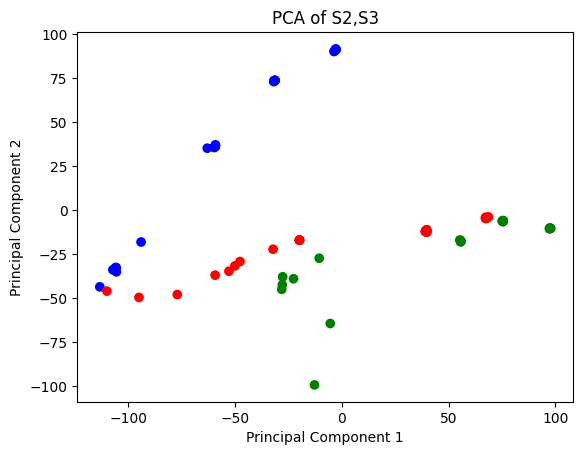

In [18]:
plt.scatter(s2_s3_pca_data['PC1'], s2_s3_pca_data['PC2'], c=Y.map({1:'red', 2:'green', 3:'blue'}))
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of S2,S3')
plt.show()

Training accuracy = 0.8333333333333334
Testing accuracy =  0.8666666666666667


/home/soham/anaconda3/envs/btpenv/lib/python3.11/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


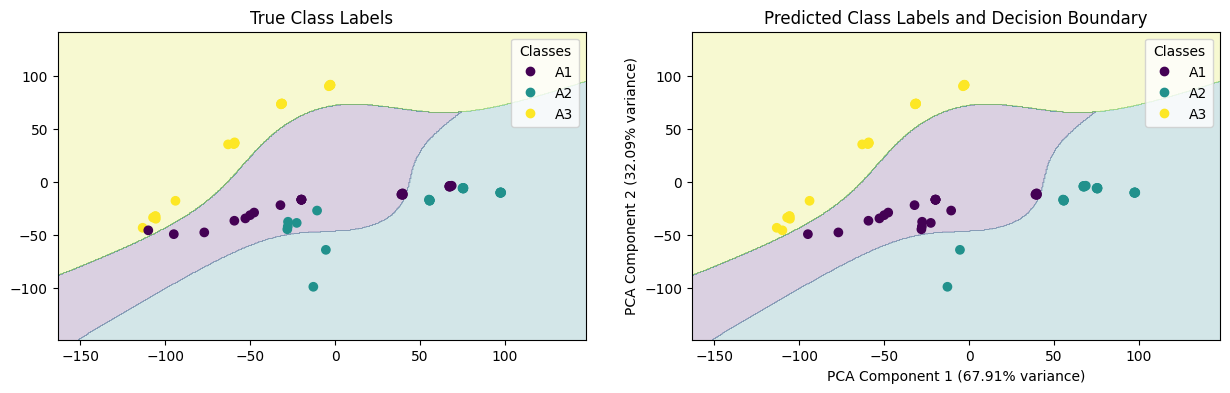

In [19]:
X_train, X_test, Y_train, Y_test = train_test_split(s2_s3_pca_data[['PC1','PC2']], Y, test_size=0.2, random_state=42)

svm = SVC(kernel='poly')
svm.fit(X_train, Y_train)

print('Training accuracy =', svm.score(X_train, Y_train))
svm_train_acc.append(svm.score(X_train, Y_train))

print('Testing accuracy = ',svm.score(X_test, Y_test))
svm_test_acc.append(svm.score(X_test, Y_test))

label_mapping = {1:'A1', 2:'A2', 3:'A3'}
s2_s3_pca_data['Labels'] = Y.map(label_mapping)

plot_pca_decision_boundary(pca, s2_s3_pca_data, svm, label_mapping)

Training accuracy = 1.0
Testing accuracy =  0.9333333333333333


/home/soham/anaconda3/envs/btpenv/lib/python3.11/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


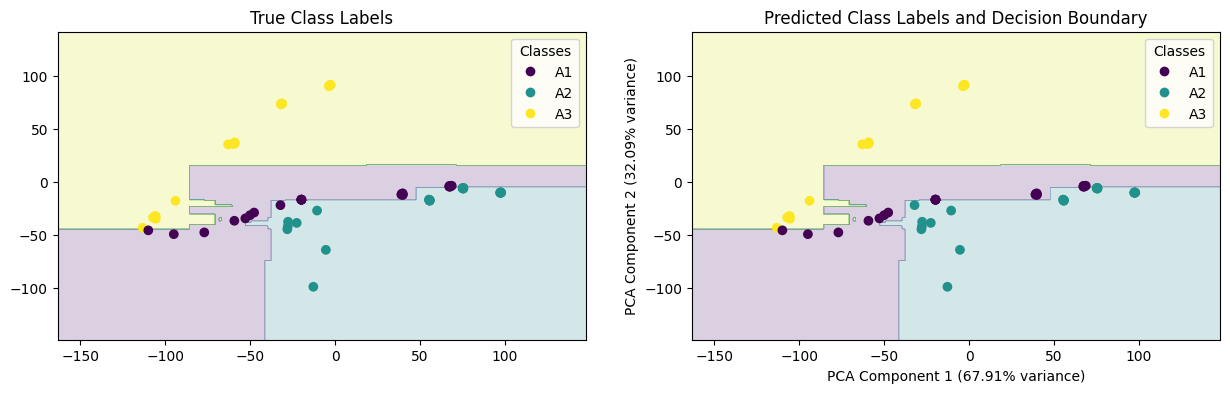

In [20]:
rfc = RandomForestClassifier()
rfc.fit(X_train, Y_train)

print('Training accuracy =', rfc.score(X_train, Y_train))
rfc_train_acc.append(rfc.score(X_train, Y_train))

print('Testing accuracy = ',rfc.score(X_test, Y_test))
rfc_test_acc.append(rfc.score(X_test, Y_test))

plot_pca_decision_boundary(pca, s2_s3_pca_data, rfc, label_mapping)

## PCA using S2, S4

In [21]:
s2_s4_X = data[['Sensor2', 'Sensor4']]

combination.append('S2-S4')

pca = PCA(n_components=2)
X_r = pca.fit_transform(s2_s4_X).T

s2_s4_pca_data = pd.DataFrame(data = X_r.T, columns = ['PC1', 'PC2'])
s2_s4_pca_data.head()

,PC1,PC2
0,-42.748222,-67.906658
1,213.261846,-84.859868
2,247.525844,48.630124
3,-213.608159,-38.473014
4,-203.790750,-21.728905


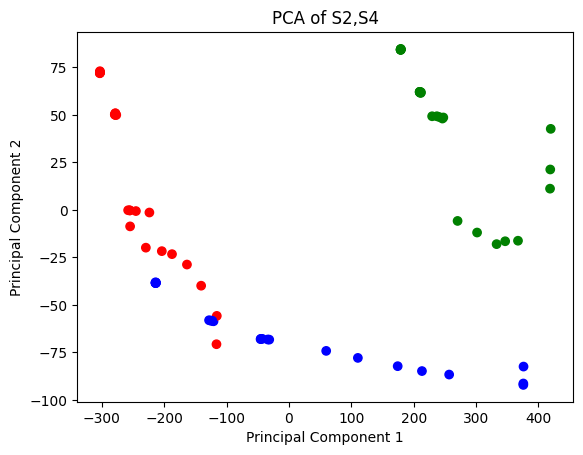

In [22]:
plt.scatter(s2_s4_pca_data['PC1'], s2_s4_pca_data['PC2'], c=Y.map({1:'red', 2:'green', 3:'blue'}))
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of S2,S4')
plt.show()

Training accuracy = 0.95
Testing accuracy =  0.8


/home/soham/anaconda3/envs/btpenv/lib/python3.11/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


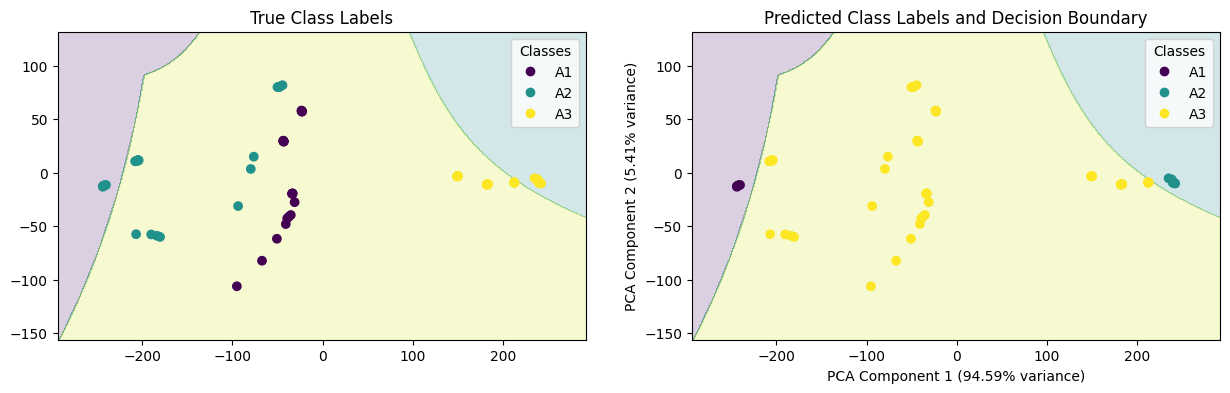

In [23]:
X_train, X_test, Y_train, Y_test = train_test_split(s2_s4_pca_data[['PC1','PC2']], Y, test_size=0.2, random_state=42)

svm = SVC(kernel='poly')
svm.fit(X_train, Y_train)

print('Training accuracy =', svm.score(X_train, Y_train))
svm_train_acc.append(svm.score(X_train, Y_train))

print('Testing accuracy = ',svm.score(X_test, Y_test))
svm_test_acc.append(svm.score(X_test, Y_test))

label_mapping = {1:'A1', 2:'A2', 3:'A3'}
s2_s4_pca_data['Labels'] = Y.map(label_mapping)

plot_pca_decision_boundary(pca, s1_s2_pca_data, svm, label_mapping)

Training accuracy = 1.0
Testing accuracy =  1.0


/home/soham/anaconda3/envs/btpenv/lib/python3.11/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


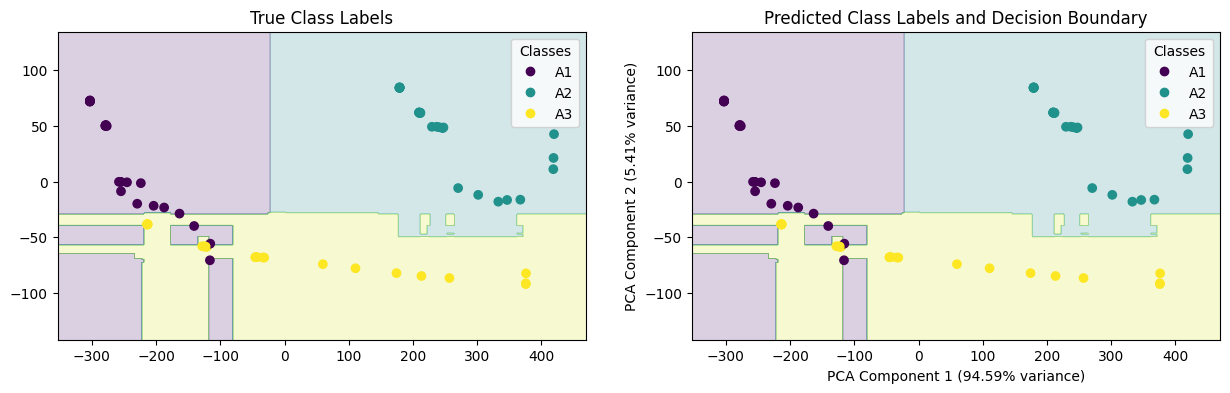

In [24]:
rfc = RandomForestClassifier()
rfc.fit(X_train, Y_train)

print('Training accuracy =', rfc.score(X_train, Y_train))
rfc_train_acc.append(rfc.score(X_train, Y_train))

print('Testing accuracy = ',rfc.score(X_test, Y_test))
rfc_test_acc.append(rfc.score(X_test, Y_test))

plot_pca_decision_boundary(pca, s2_s4_pca_data, rfc, label_mapping)

## PCA using S3, S4

In [25]:
s3_s4_X = data[['Sensor3', 'Sensor4']]

combination.append('S3-S4')

pca = PCA(n_components=2)
X_r = pca.fit_transform(s3_s4_X).T

s3_s4_pca_data = pd.DataFrame(data = X_r.T, columns = ['PC1', 'PC2'])
s3_s4_pca_data.head()

,PC1,PC2
0,-40.430555,0.475269
1,220.542014,-65.679144
2,244.526730,25.978074
3,-216.481350,64.883070
4,-199.366075,-63.952552


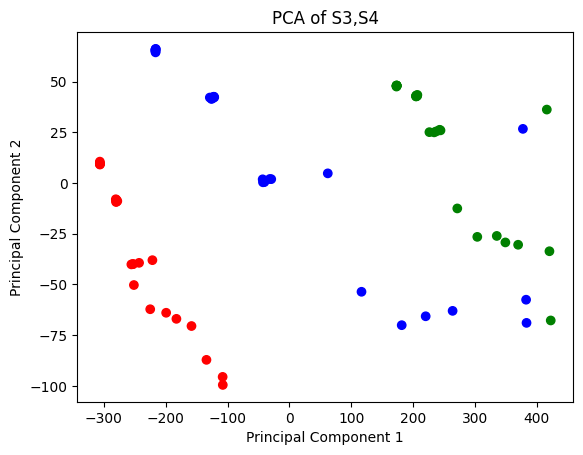

In [26]:
plt.scatter(s3_s4_pca_data['PC1'], s3_s4_pca_data['PC2'], c=Y.map({1:'red', 2:'green', 3:'blue'}))
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of S3,S4')
plt.show()

Training accuracy = 0.8166666666666667
Testing accuracy =  0.8666666666666667


/home/soham/anaconda3/envs/btpenv/lib/python3.11/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


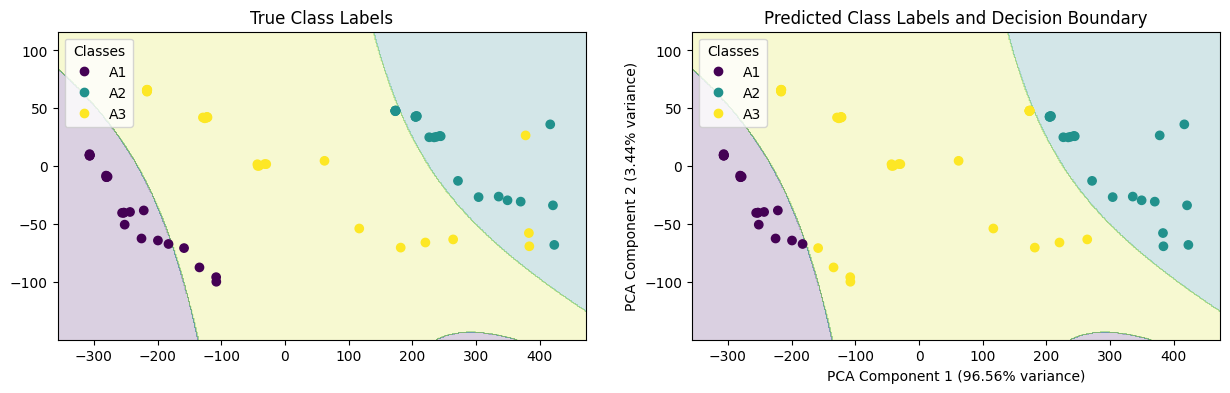

In [27]:
X_train, X_test, Y_train, Y_test = train_test_split(s3_s4_pca_data[['PC1','PC2']], Y, test_size=0.2, random_state=42)

svm = SVC(kernel='poly')
svm.fit(X_train, Y_train)

print('Training accuracy =', svm.score(X_train, Y_train))
svm_train_acc.append(svm.score(X_train, Y_train))

print('Testing accuracy = ',svm.score(X_test, Y_test))
svm_test_acc.append(svm.score(X_test, Y_test))

label_mapping = {1:'A1', 2:'A2', 3:'A3'}
s3_s4_pca_data['Labels'] = Y.map(label_mapping)

plot_pca_decision_boundary(pca, s3_s4_pca_data, svm, label_mapping)

Training accuracy = 1.0
Testing accuracy =  1.0


/home/soham/anaconda3/envs/btpenv/lib/python3.11/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


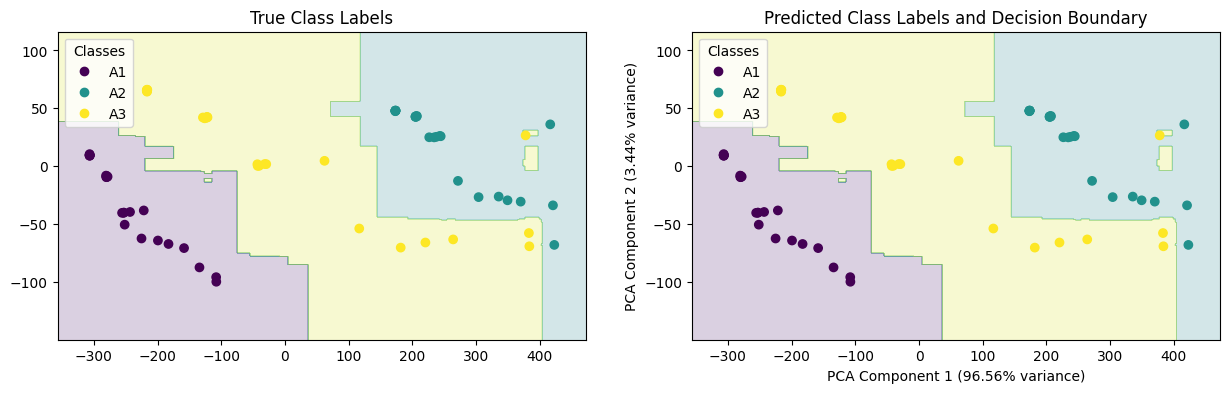

In [28]:
rfc = RandomForestClassifier()
rfc.fit(X_train, Y_train)

print('Training accuracy =', rfc.score(X_train, Y_train))
rfc_train_acc.append(rfc.score(X_train, Y_train))

print('Testing accuracy = ',rfc.score(X_test, Y_test))
rfc_test_acc.append(rfc.score(X_test, Y_test))

plot_pca_decision_boundary(pca, s3_s4_pca_data, rfc, label_mapping)

## PCA using S1, S2, S3 

In [29]:
s1_s2_s3_X = data[['Sensor1','Sensor2','Sensor3']]

combination.append('S1-S2-S3')

pca = PCA(n_components=2)
X_r = pca.fit_transform(s1_s2_s3_X).T

s1_s2_s3_pca_data = pd.DataFrame(data = X_r.T, columns = ['PC1', 'PC2'])
s1_s2_s3_pca_data.head()

,PC1,PC2
0,212.373361,-5.808818
1,238.390923,-73.629031
2,-243.572672,5.245186
3,151.216713,60.069739
4,-38.263527,-65.442300


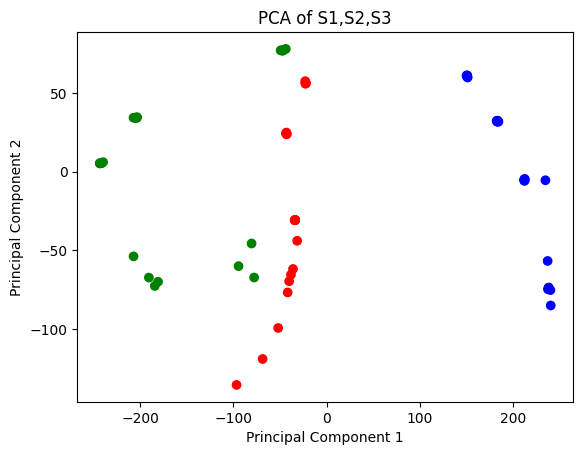

In [30]:
plt.scatter(s1_s2_s3_pca_data['PC1'], s1_s2_s3_pca_data['PC2'], c=Y.map({1:'red', 2:'green', 3:'blue'}))
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of S1,S2,S3')
plt.show()

Training accuracy = 0.8666666666666667
Testing accuracy =  0.9333333333333333


/home/soham/anaconda3/envs/btpenv/lib/python3.11/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


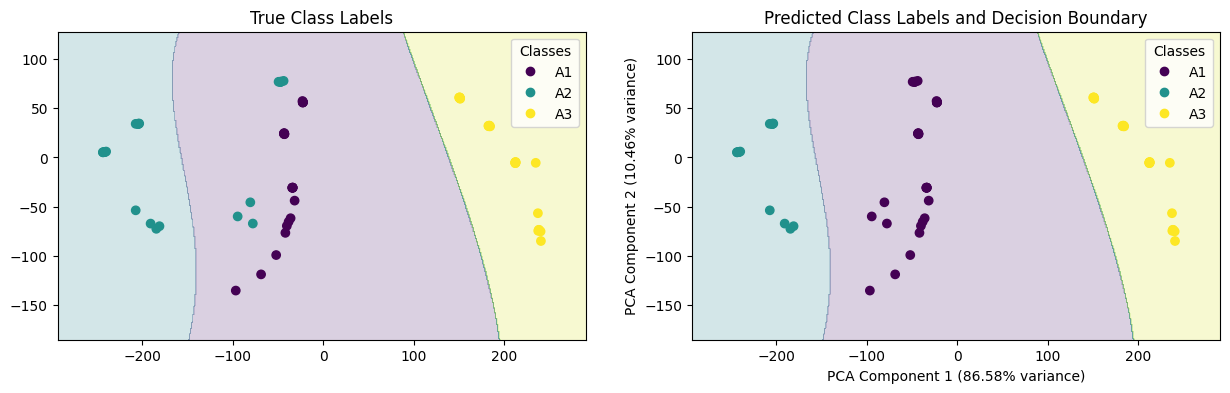

In [31]:
X_train, X_test, Y_train, Y_test = train_test_split(s1_s2_s3_pca_data[['PC1','PC2']], Y, test_size=0.2, random_state=42)

svm = SVC(kernel='poly')
svm.fit(X_train, Y_train)

print('Training accuracy =', svm.score(X_train, Y_train))
svm_train_acc.append(svm.score(X_train, Y_train))

print('Testing accuracy = ',svm.score(X_test, Y_test))
svm_test_acc.append(svm.score(X_test, Y_test))

label_mapping = {1:'A1', 2:'A2', 3:'A3'}
s1_s2_s3_pca_data['Labels'] = Y.map(label_mapping)

plot_pca_decision_boundary(pca, s1_s2_s3_pca_data, svm, label_mapping)

Training accuracy = 1.0
Testing accuracy =  1.0


/home/soham/anaconda3/envs/btpenv/lib/python3.11/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


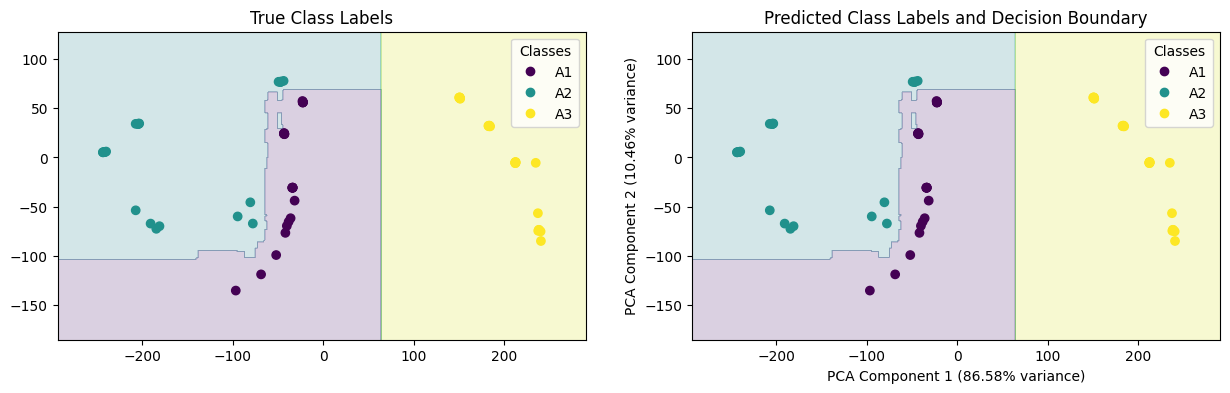

In [32]:
rfc = RandomForestClassifier()
rfc.fit(X_train, Y_train)

print('Training accuracy =', rfc.score(X_train, Y_train))
rfc_train_acc.append(rfc.score(X_train, Y_train))

print('Testing accuracy = ',rfc.score(X_test, Y_test))
rfc_test_acc.append(rfc.score(X_test, Y_test))

plot_pca_decision_boundary(pca, s1_s2_s3_pca_data, rfc, label_mapping)

## PCA using S2, S3, S4

In [33]:
s2_s3_s4_X = data[['Sensor2', 'Sensor3', 'Sensor4']]

combination.append('S2-S3-S4')

pca = PCA(n_components=2)
X_r = pca.fit_transform(s2_s3_s4_X).T

s2_s3_s4_pca_data = pd.DataFrame(data = X_r.T, columns = ['PC1', 'PC2'])
s2_s3_s4_pca_data.head()

,PC1,PC2
0,-42.775414,-59.493964
1,217.735949,-105.888867
2,246.356935,55.343847
3,-217.887121,-2.908037
4,-200.274264,-49.841645


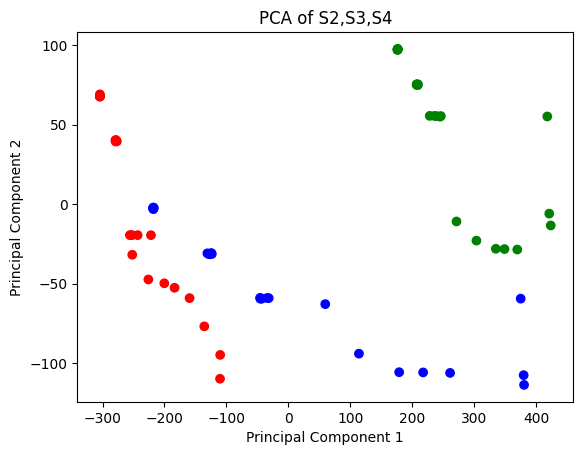

In [34]:
plt.scatter(s2_s3_s4_pca_data['PC1'], s2_s3_s4_pca_data['PC2'], c=Y.map({1:'red', 2:'green', 3:'blue'}))
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of S2,S3,S4')
plt.show()

Training accuracy = 0.9333333333333333
Testing accuracy =  0.8


/home/soham/anaconda3/envs/btpenv/lib/python3.11/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


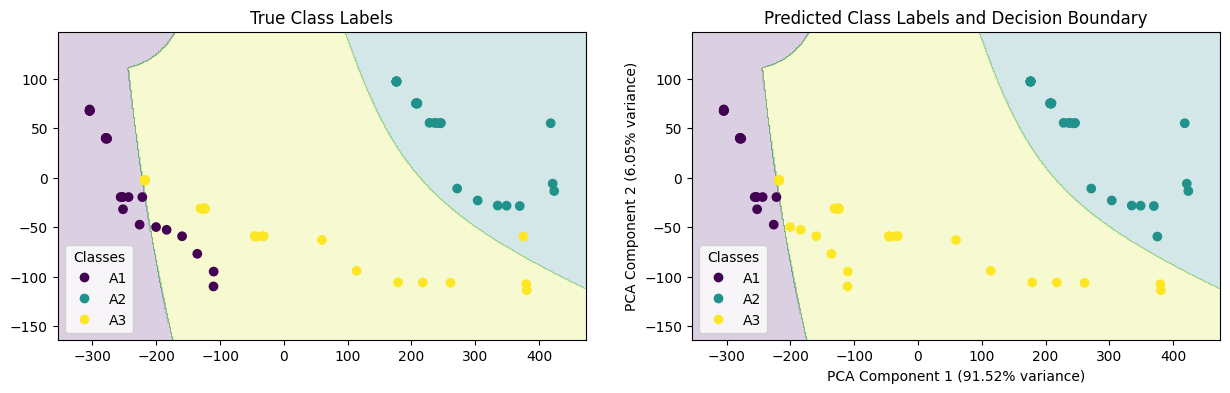

In [35]:
X_train, X_test, Y_train, Y_test = train_test_split(s2_s3_s4_pca_data[['PC1','PC2']], Y, test_size=0.2, random_state=42)

svm = SVC(kernel='poly')
svm.fit(X_train, Y_train)

print('Training accuracy =', svm.score(X_train, Y_train))
svm_train_acc.append(svm.score(X_train, Y_train))

print('Testing accuracy = ',svm.score(X_test, Y_test))
svm_test_acc.append(svm.score(X_test, Y_test))

label_mapping = {1:'A1', 2:'A2', 3:'A3'}
s2_s3_s4_pca_data['Labels'] = Y.map(label_mapping)

plot_pca_decision_boundary(pca, s2_s3_s4_pca_data, svm, label_mapping)

Training accuracy = 1.0
Testing accuracy =  0.8


/home/soham/anaconda3/envs/btpenv/lib/python3.11/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


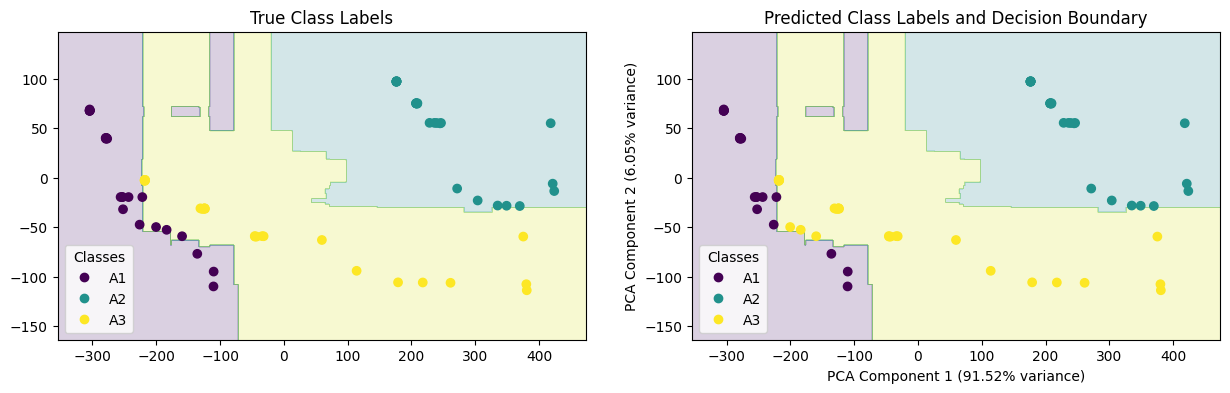

In [36]:
rfc = RandomForestClassifier()
rfc.fit(X_train, Y_train)

print('Training accuracy =', rfc.score(X_train, Y_train))
rfc_train_acc.append(rfc.score(X_train, Y_train))

print('Testing accuracy = ',rfc.score(X_test, Y_test))
rfc_test_acc.append(rfc.score(X_test, Y_test))

plot_pca_decision_boundary(pca, s2_s3_s4_pca_data, rfc, label_mapping)

## PCA using S1, S2, S4

In [37]:
s1_s2_s4_X = data[['Sensor1', 'Sensor2', 'Sensor4']]

combination.append('S1-S2-S4')

pca = PCA(n_components=2)
X_r = pca.fit_transform(s1_s2_s4_X).T

s1_s2_s4_pca_data = pd.DataFrame(data = X_r.T, columns = ['PC1', 'PC2'])
s1_s2_s4_pca_data.head()

,PC1,PC2
0,-93.278417,195.027308
1,147.566824,287.178572
2,300.079030,-172.567229
3,-243.400878,90.640791
4,-185.959427,-87.690664


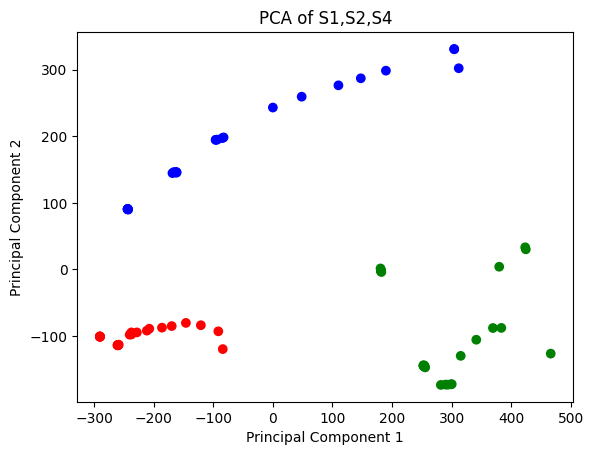

In [38]:
plt.scatter(s1_s2_s4_pca_data['PC1'], s1_s2_s4_pca_data['PC2'], c=Y.map({1:'red', 2:'green', 3:'blue'}))
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of S1,S2,S4')
plt.show()

Training accuracy = 1.0
Testing accuracy =  1.0


/home/soham/anaconda3/envs/btpenv/lib/python3.11/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


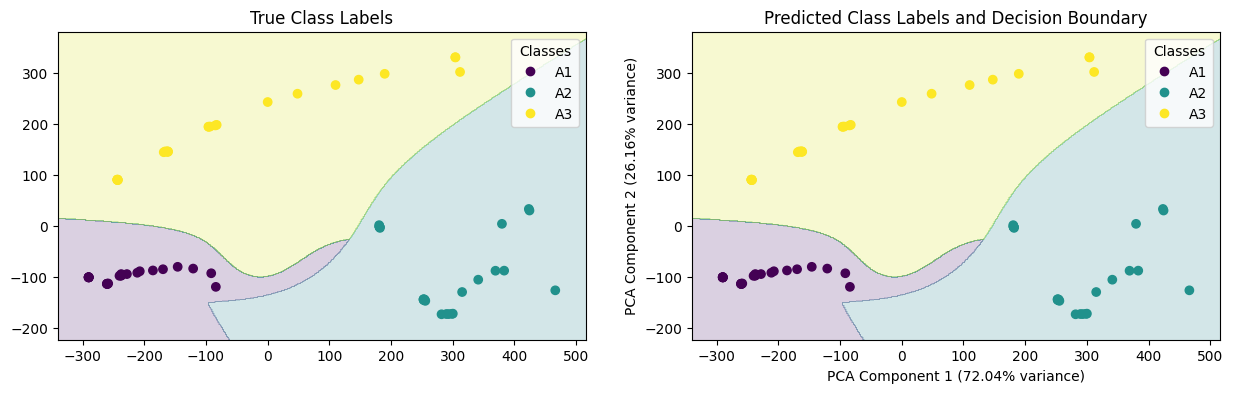

In [39]:
X_train, X_test, Y_train, Y_test = train_test_split(s1_s2_s4_pca_data[['PC1','PC2']], Y, test_size=0.2, random_state=42)

svm = SVC(kernel='poly')
svm.fit(X_train, Y_train)

print('Training accuracy =', svm.score(X_train, Y_train))
svm_train_acc.append(svm.score(X_train, Y_train))

print('Testing accuracy = ',svm.score(X_test, Y_test))
svm_test_acc.append(svm.score(X_test, Y_test))

label_mapping = {1:'A1', 2:'A2', 3:'A3'}
s1_s2_s4_pca_data['Labels'] = Y.map(label_mapping)

plot_pca_decision_boundary(pca, s1_s2_s4_pca_data, svm, label_mapping)

Training accuracy = 1.0
Testing accuracy =  1.0


/home/soham/anaconda3/envs/btpenv/lib/python3.11/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


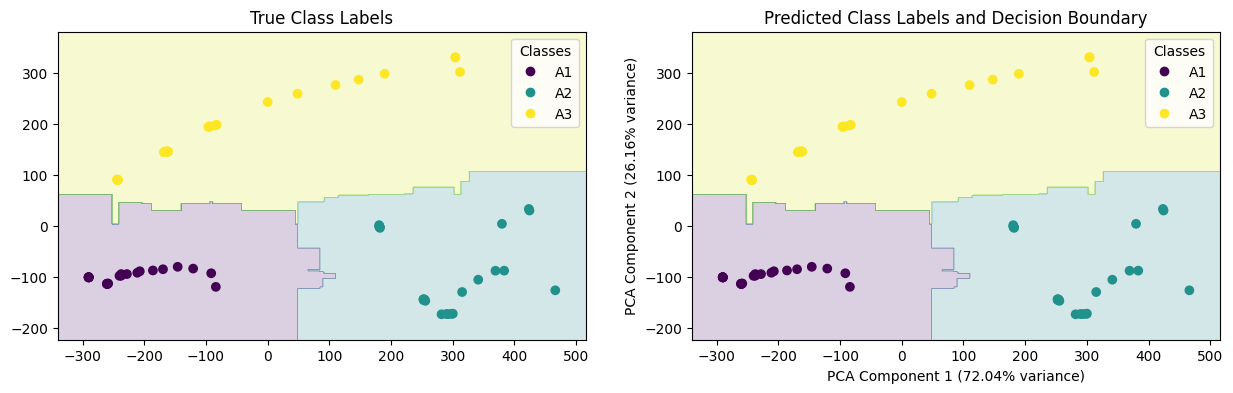

In [40]:
rfc = RandomForestClassifier()
rfc.fit(X_train, Y_train)

print('Training accuracy =', rfc.score(X_train, Y_train))
rfc_train_acc.append(rfc.score(X_train, Y_train))

print('Testing accuracy = ',rfc.score(X_test, Y_test))
rfc_test_acc.append(rfc.score(X_test, Y_test))

plot_pca_decision_boundary(pca, s1_s2_s4_pca_data, rfc, label_mapping)

## PCA using S1, S3, S4

In [41]:
s1_s3_s4_X = data[['Sensor1', 'Sensor3', 'Sensor4']]

combination.append('S1-S3-S4')

pca = PCA(n_components=2)
X_r = pca.fit_transform(s1_s3_s4_X).T

s1_s3_s4_pca_data = pd.DataFrame(data = X_r.T, columns = ['PC1', 'PC2'])
s1_s3_s4_pca_data.head()

,PC1,PC2
0,-87.680966,185.248473
1,159.291915,273.389370
2,294.514829,-171.238866
3,-244.533895,86.570557
4,-181.993587,-94.460115


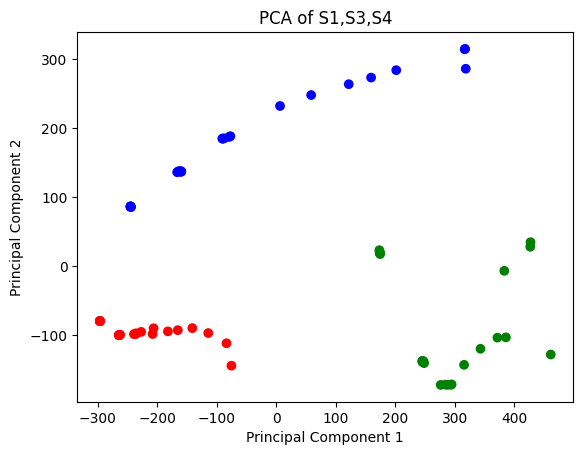

In [42]:
plt.scatter(s1_s3_s4_pca_data['PC1'], s1_s3_s4_pca_data['PC2'], c=Y.map({1:'red', 2:'green', 3:'blue'}))
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of S1,S3,S4')
plt.show()

Training accuracy = 0.9166666666666666
Testing accuracy =  0.9333333333333333


/home/soham/anaconda3/envs/btpenv/lib/python3.11/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


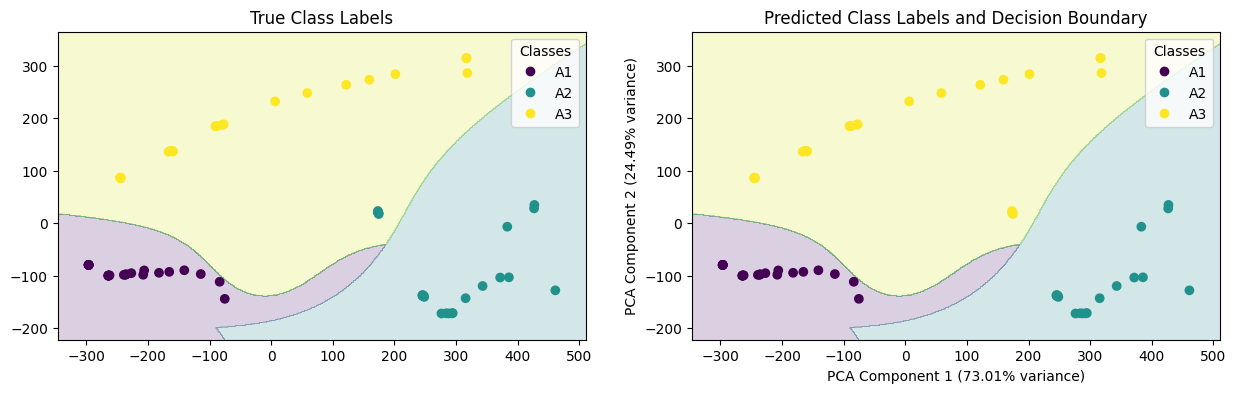

In [43]:
X_train, X_test, Y_train, Y_test = train_test_split(s1_s3_s4_pca_data[['PC1','PC2']], Y, test_size=0.2, random_state=42)

svm = SVC(kernel='poly')
svm.fit(X_train, Y_train)

print('Training accuracy =', svm.score(X_train, Y_train))
svm_train_acc.append(svm.score(X_train, Y_train))

print('Testing accuracy = ',svm.score(X_test, Y_test))
svm_test_acc.append(svm.score(X_test, Y_test))

label_mapping = {1:'A1', 2:'A2', 3:'A3'}
s1_s3_s4_pca_data['Labels'] = Y.map(label_mapping)

plot_pca_decision_boundary(pca, s1_s3_s4_pca_data, svm, label_mapping)

Training accuracy = 1.0
Testing accuracy =  1.0


/home/soham/anaconda3/envs/btpenv/lib/python3.11/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


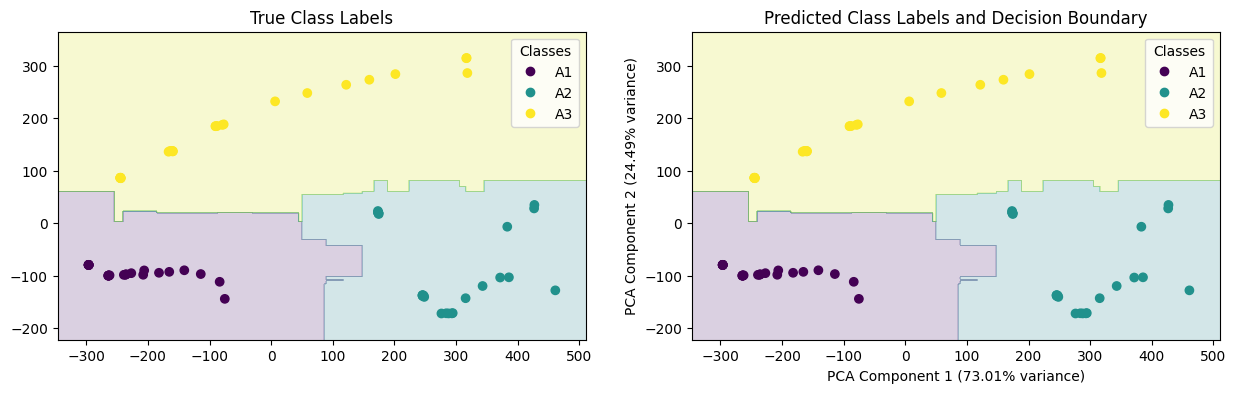

In [44]:
rfc = RandomForestClassifier()
rfc.fit(X_train, Y_train)

print('Training accuracy =', rfc.score(X_train, Y_train))
rfc_train_acc.append(rfc.score(X_train, Y_train))

print('Testing accuracy = ',rfc.score(X_test, Y_test))
rfc_test_acc.append(rfc.score(X_test, Y_test))

plot_pca_decision_boundary(pca, s1_s3_s4_pca_data, rfc, label_mapping)

## Analysis Graphs

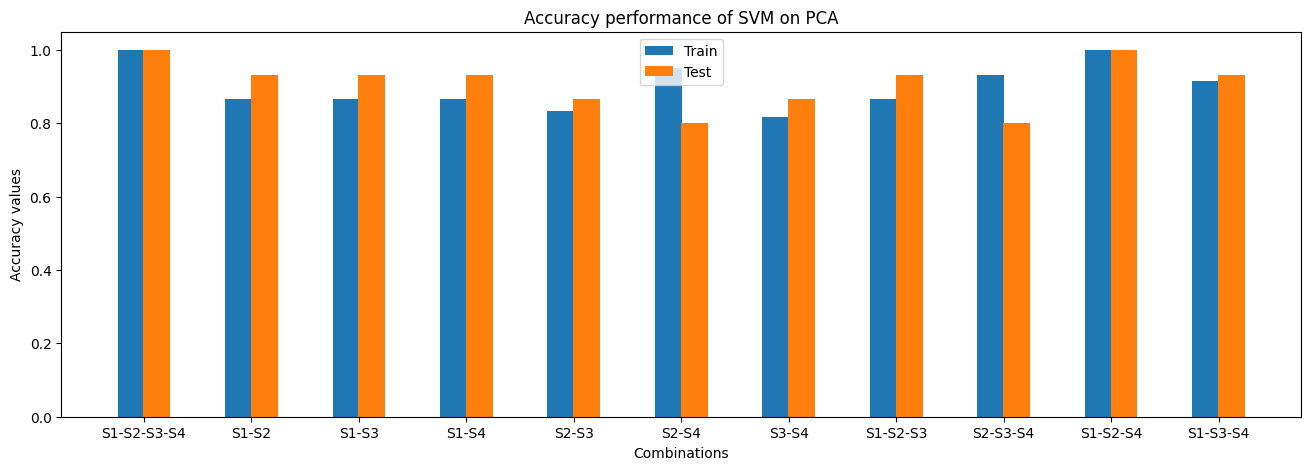

In [45]:
x = [i for i in range(1, 1+len(combination))]
x1 = [i-0.12 for i in x]
x2 = [i+0.12 for i in x]

plt.figure(figsize=(16,5))
plt.bar(x1, svm_train_acc, width=0.25, label='Train')
plt.bar(x2, svm_test_acc, width=0.25, label='Test')
plt.xticks(x, combination)
plt.xlabel('Combinations')
plt.ylabel('Accuracy values')
plt.legend()
plt.title('Accuracy performance of SVM on PCA')
plt.show()

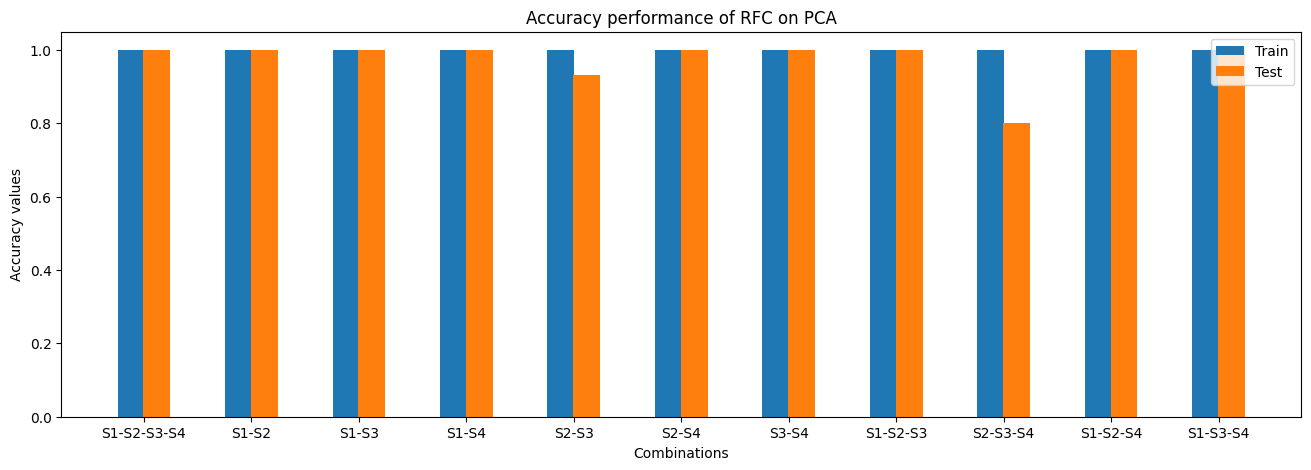

In [46]:
x = [i for i in range(1, 1+len(combination))]
x1 = [i-0.12 for i in x]
x2 = [i+0.12 for i in x]

plt.figure(figsize=(16,5))
plt.bar(x1, rfc_train_acc, width=0.25, label='Train')
plt.bar(x2, rfc_test_acc, width=0.25, label='Test')
plt.xticks(x, combination)
plt.xlabel('Combinations')
plt.ylabel('Accuracy values')
plt.legend()
plt.title('Accuracy performance of RFC on PCA')
plt.show()

In [47]:
accuracy_table = pd.DataFrame({
    'Combination': combination,
    'SVM Train Accuracy': [round(acc, 4)*100 for acc in svm_train_acc],
    'SVM Test Accuracy': [round(acc, 4)*100 for acc in svm_test_acc],
    'RFC Train Accuracy': [round(acc, 4)*100 for acc in rfc_train_acc],
    'RFC Test Accuracy': [round(acc, 4)*100 for acc in rfc_test_acc]
})
accuracy_table

,Combination,SVM Train Accuracy,SVM Test Accuracy,RFC Train Accuracy,RFC Test Accuracy
0,S1-S2-S3-S4,100.00,100.00,100.0,100.00
1,S1-S2,86.67,93.33,100.0,100.00
2,S1-S3,86.67,93.33,100.0,100.00
3,S1-S4,86.67,93.33,100.0,100.00
4,S2-S3,83.33,86.67,100.0,93.33
5,S2-S4,95.00,80.00,100.0,100.00
6,S3-S4,81.67,86.67,100.0,100.00
7,S1-S2-S3,86.67,93.33,100.0,100.00
8,S2-S3-S4,93.33,80.00,100.0,80.00
9,S1-S2-S4,100.00,100.00,100.0,100.00
